In [10]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
pip install tweepy pandas


In [3]:
pip install snscrape


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 3.3 MB/s eta 0:00:00


In [4]:
pip install --upgrade snscrape


In [5]:
pip install snscrape geopy pandas


In [7]:
!snscrape --jsonl twitter-search "#ghibli since:2023-01-01 until:2025-04-01" > ghibli.json


2025-04-05 13:41:55.236  ERROR  snscrape.base  Error retrieving https://twitter.com/search?f=live&lang=en&q=%23ghibli+since%3A2023-01-01+until%3A2025-04-01&src=spelling_expansion_revert_click: SSLError(MaxRetryError("HTTPSConnectionPool(host='twitter.com', port=443): Max retries exceeded with url: /search?f=live&lang=en&q=%23ghibli+since%3A2023-01-01+until%3A2025-04-01&src=spelling_expansion_revert_click (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)')))"))
2025-04-05 13:41:55.236  CRITICAL  snscrape.base  4 requests to https://twitter.com/search?f=live&lang=en&q=%23ghibli+since%3A2023-01-01+until%3A2025-04-01&src=spelling_expansion_revert_click failed, giving up.
2025-04-05 13:41:55.236  CRITICAL  snscrape.base  Errors: SSLError(MaxRetryError("HTTPSConnectionPool(host='twitter.com', port=443): Max retries exceeded with url: /search?f=live&lang=en&q=%23ghibli+since%3A2023-

In [11]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Load the dataset
file_path = "/content/drive/MyDrive/GIS/ghibli_tweets_latlong_full.csv"
df = pd.read_csv(file_path)

# Basic analysis of the dataset
print("Dataset Overview:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())
print("\nNumber of tweets per unique location:")
print(df.groupby(['latitude', 'longitude']).size().reset_index(name='count'))

# Create a base map centered on the world
m = folium.Map(location=[20, 0], zoom_start=2)  # Centered roughly on the globe

# Add a marker cluster to handle multiple markers efficiently
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each tweet
for index, row in df.iterrows():
    # Skip entries with lat/long as 0,0 (Not specified)
    if row['latitude'] == 0 and row['longitude'] == 0:
        continue

    # Create popup content
    popup_content = f"""
    <b>Username:</b> {row['username']}<br>
    <b>Comment:</b> {row['content']}<br>
    <b>Date:</b> {row['date']}
    """

    # Add marker to the map
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=popup_content,
        tooltip=row['username']  # Shows username on hover
    ).add_to(marker_cluster)

# Save the map as an HTML file
map_path = "/content/drive/MyDrive/GIS/ghibli_tweets_map.html"
m.save(map_path)

print(f"✅ Interactive map saved successfully at:\n{map_path}")
print("Open the HTML file in a web browser to view the map!")

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   username     100 non-null    object 
 1   displayName  100 non-null    object 
 2   content      100 non-null    object 
 3   date         100 non-null    object 
 4   latitude     100 non-null    float64
 5   longitude    100 non-null    float64
 6   tweet_url    100 non-null    object 
dtypes: float64(2), object(5)
memory usage: 5.6+ KB
None

First 5 rows:
        username            displayName  \
0   GhibliFan123    Studio Ghibli Lover   
1    ArtOfGhibli  Ghibli Art Enthusiast   
2   AnimeJourney  Journey Through Anime   
3   SpiritedSoul       Miyazaki Fanatic   
4  GhibliDreamer       Dreams of Ghibli   

                                             content                  date  \
0   Rewatching Spirited Away tonight! #ghibli #anime  2025-03-01T15:30:00Z   
1  The backgro

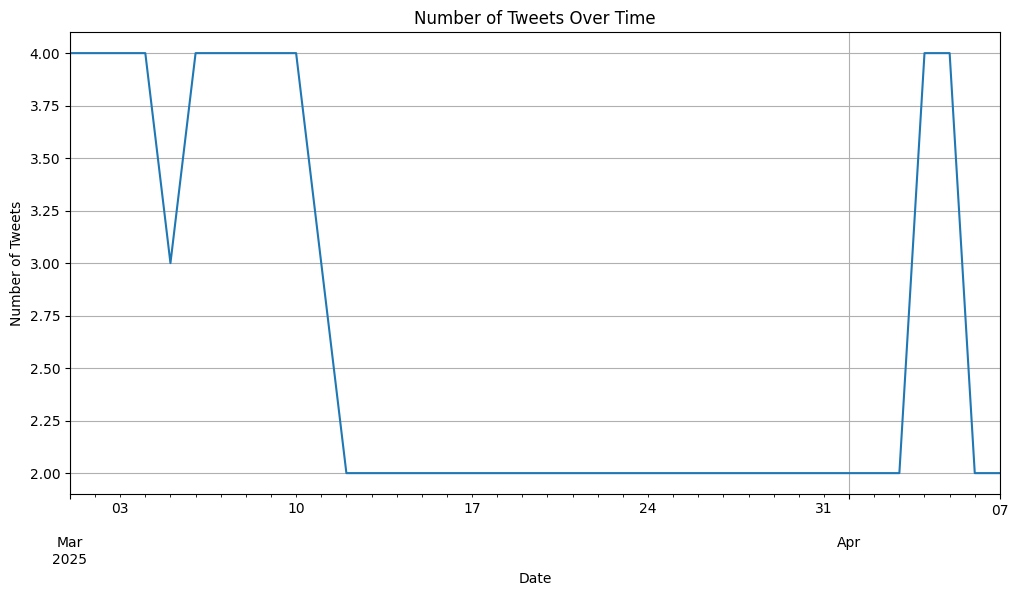

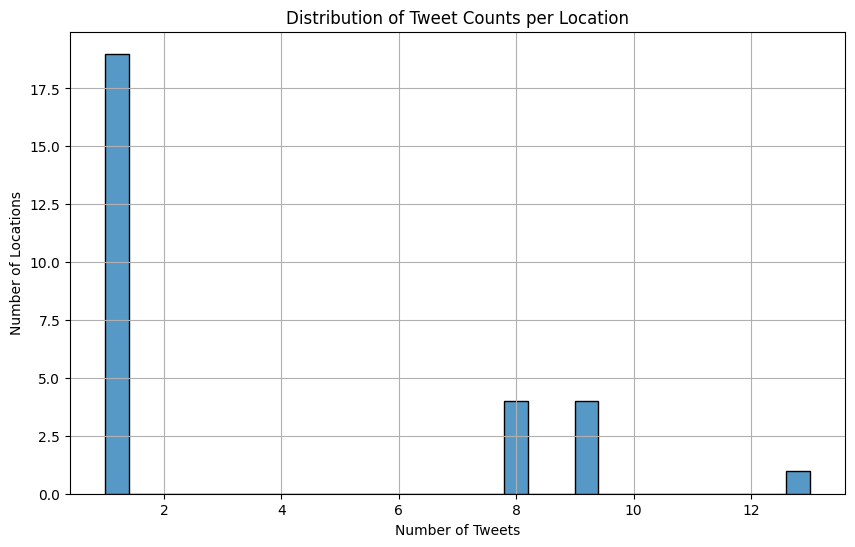

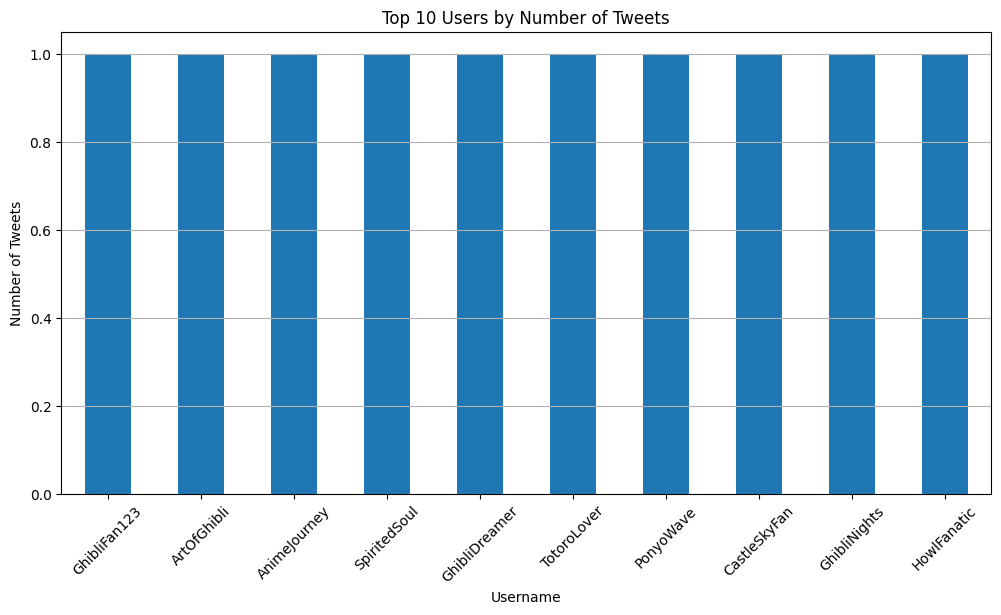

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/drive/MyDrive/GIS/ghibli_tweets_latlong_full.csv"
df = pd.read_csv(file_path)

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Set 'date' as the index
df.set_index('date', inplace=True)

# 1. Number of Tweets Over Time
plt.figure(figsize=(12, 6))
df.resample('D').size().plot()
plt.title('Number of Tweets Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()

# 2. Number of Tweets per Unique Location
location_counts = df.groupby(['latitude', 'longitude']).size().reset_index(name='count')
plt.figure(figsize=(10, 6))
sns.histplot(location_counts['count'], bins=30, kde=False)
plt.title('Distribution of Tweet Counts per Location')
plt.xlabel('Number of Tweets')
plt.ylabel('Number of Locations')
plt.grid(True)
plt.show()

# 3. Top 10 Users by Number of Tweets
user_counts = df['username'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
user_counts.plot(kind='bar')
plt.title('Top 10 Users by Number of Tweets')
plt.xlabel('Username')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


